In [1]:
# Read the data from local folder
import os
import pandas as pd
import utils
import numpy as np

ROOT = os.path.abspath('dataset')

df_trans = pd.read_csv(os.path.join(ROOT, 'JusticIA_DatosTranscripciones.csv'))

df_trans.info()
df_trans['NombreArchivo'][32]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fuente         2959 non-null   object
 1   Conjunto       2959 non-null   object
 2   NombreArchivo  2959 non-null   object
 3   Texto          2000 non-null   object
 4   MetodoTexto    2000 non-null   object
dtypes: object(5)
memory usage: 115.7+ KB


'Ficheros_ACNR_militantes_Rodriguez_Rosas_Maria_de_Lourdes_IMG_7751.JPG'

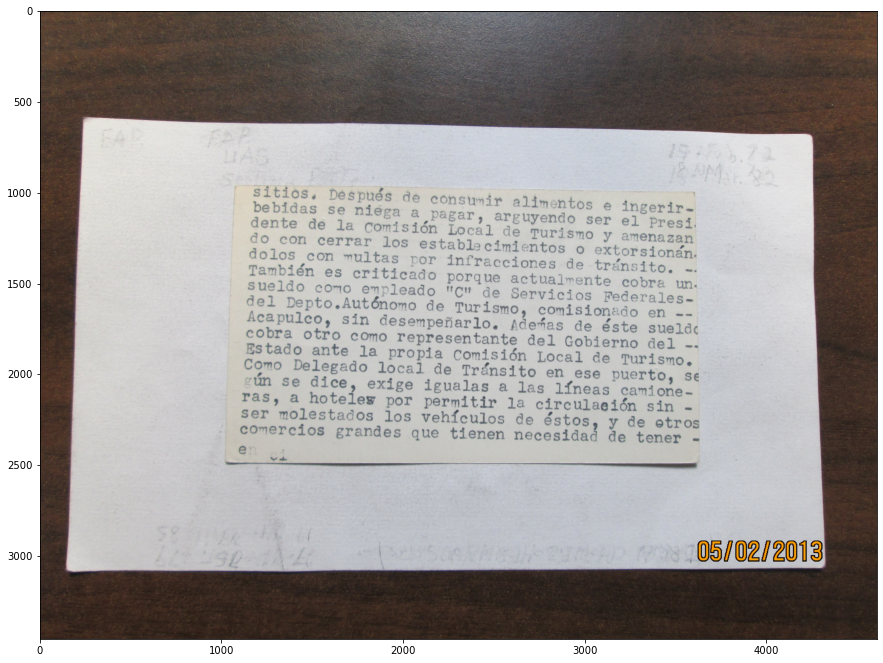

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(utils.open_idx(df_trans, ROOT, 500))


 # Test how a manually cropped image performs in tesseract

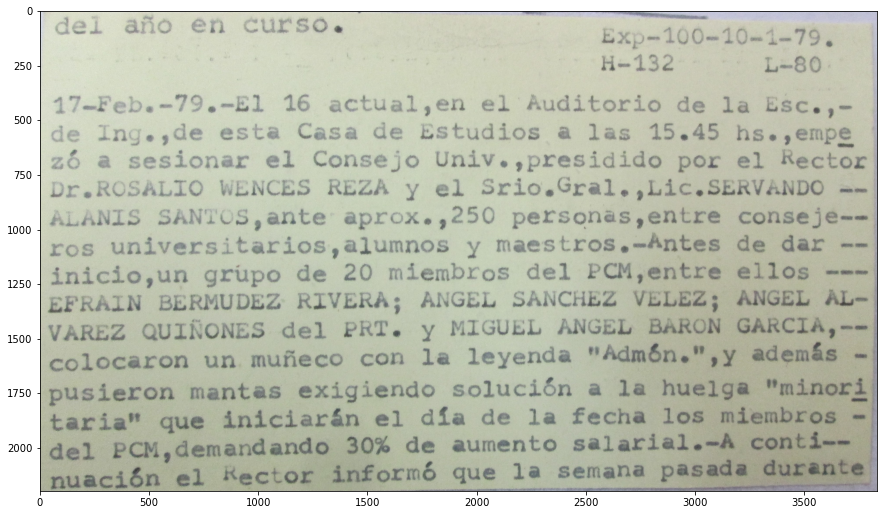

In [22]:
import cv2
img = cv2.imread('dataset/cropped_images/Ficheros_UAG_78-11-14_a_79-11-29_UAG,_fichas-44-.JPG')

h_img, w_img, _ = img.shape

utils.show_bgr_image_in_plt(img)

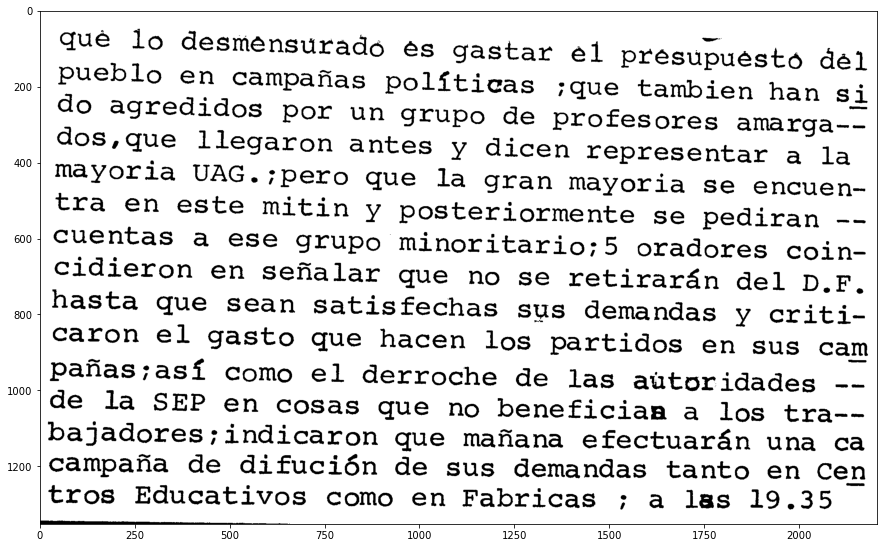

In [4]:
# Apply a simple threshold
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bw = cv2.threshold(img_gray, 160, 255, cv2.THRESH_BINARY)
plt.imshow(img_bw, 'gray')


In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blurred = cv2.medianBlur(img_gray,5)
th2 = cv2.adaptiveThreshold(img_blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

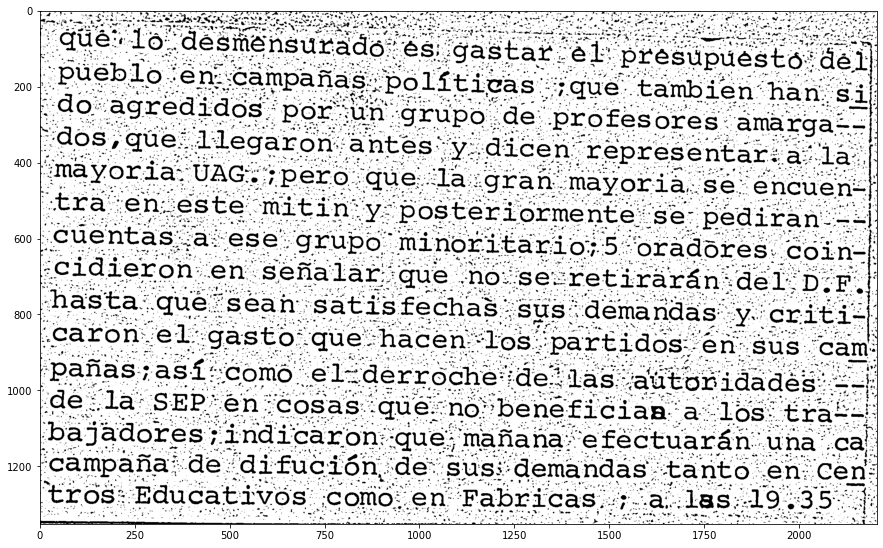

In [6]:
utils.show_bgr_image_in_plt(th2)

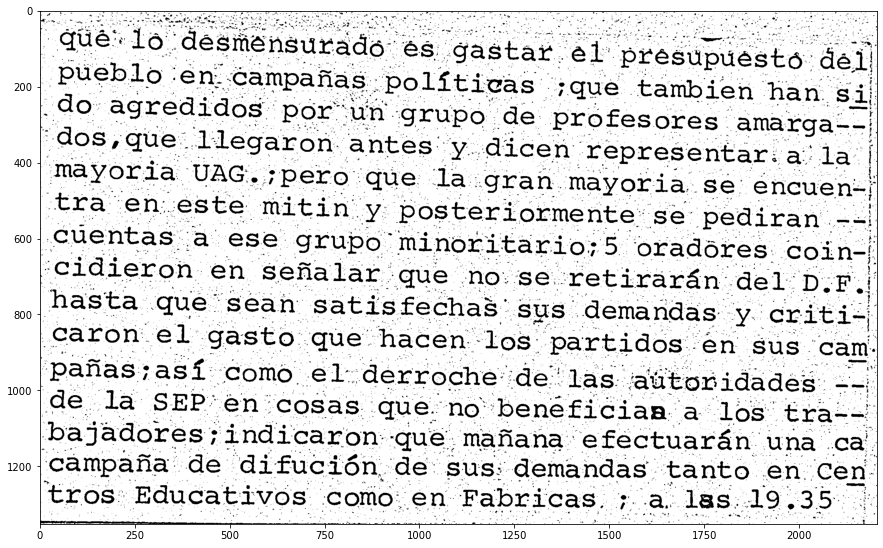

In [7]:
utils.show_bgr_image_in_plt(th3)

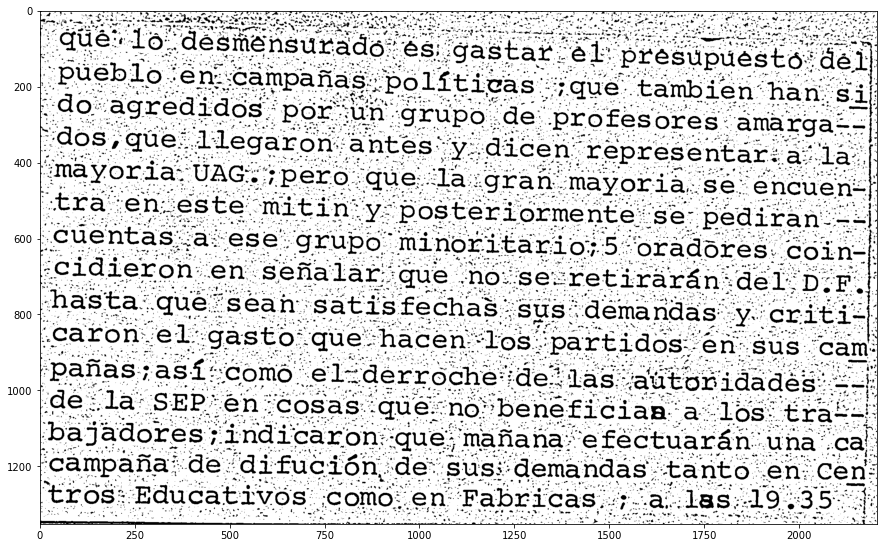

In [8]:
_, th2_bw = cv2.threshold(th2, 126, 255, cv2.THRESH_BINARY)
plt.imshow(th2_bw, 'gray')

In [9]:
import pytesseract
custom_config = r'-l spa'
string_gray = pytesseract.image_to_string(img_gray, config=custom_config)
print(string_gray)

que lo desmensurado es gastar el presupuesto del
pueblo en campañas políticas ¿que tambien han si
do agredidos por un grupo de profesores amarga-=-
dos,que llegaron antes y dicen representar a la

mayoria UAG.;pero que la gran mayoria se encuen-
tra en este mitin y posteriormente se pediran --
cuentas a ese grupo minoritario;5 oradores coin-
cidieron en señalar que no se retirarán del D.F.
hasta que sean satisfechas sus demandas y criti-
caron el gasto que hacen los partidos en sus cam
pañas;así como el derroche de las autoridades --
de la SEP en cosas que no benefician a los tra--
bajadores;indicaron que mañana efectuarán una ca
campaña de difución de sus demandas tanto en Cen
tros Educativos como en Fabricas ; a las 19.35



 # Let's try to detect the edges using hough lines



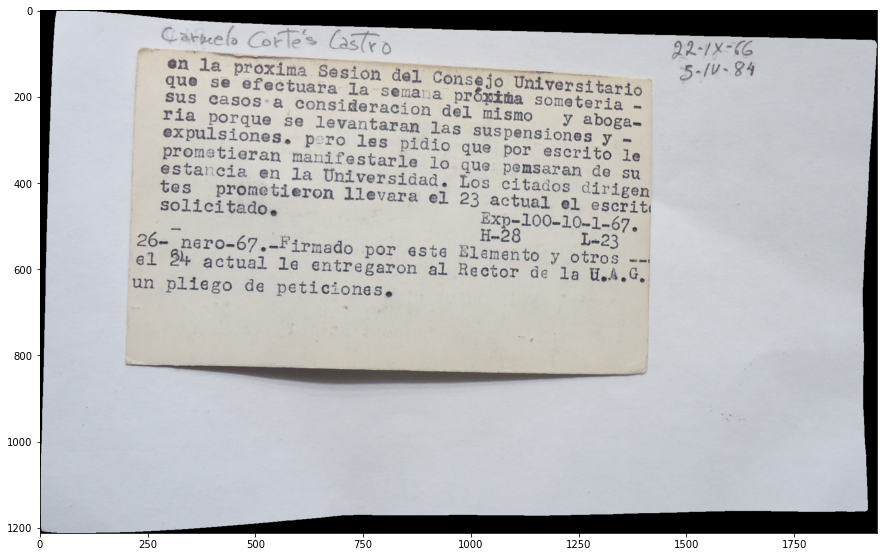

In [31]:
import cv2
import numpy as np

# read image as grayscale
img = np.array(utils.open_idx(df_trans, ROOT, 100))

# convert to grayscale
cropped_img= utils.find_contour_mask(img)

plt.imshow(cropped_img)

# Let's do rotation of the images

0


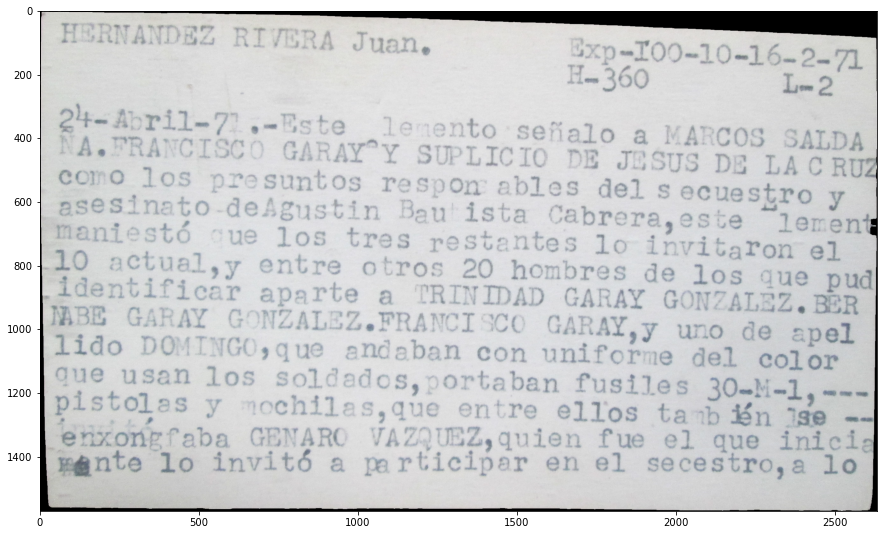

In [29]:
angle, rotated = utils.correct_skew(cropped_img)
print(angle)
plt.imshow(rotated)

In [ ]:
# Apply homomorphic filters
# Convert to grayscale or binarization

#Pass to tesseract-ocr
#Save to a csv: filename, text


